# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Tujuan Scraping ini untuk mengambil data Kurs USD selama 6 Bulan Terakhir, dari data tersebut kita bisa mendapatkan insight :
*   Fluktuasi Harian/Mingguan/Bulanan
*   Perbandingan Value Periode Tertentu
*   Korelasi Dengan Peristiwa Ekonomi yang mempengaruhi naik turun kurs yang cukup signifikan

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [65]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
pd.options.display.float_format = '{:,.2f}'.format 

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr').text

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [66]:
soup = BeautifulSoup(url_get,"html.parser")


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [67]:
table = soup.find_all('table', 
                       attrs={'class': 'history-rates-data'})
# Get the table rows
tr_lists = table[0].tbody.find_all('tr')

# Get the table columns
columns = []
for row in tr_lists:
    columns.append(row.find_all('td'))

Do the scrapping process here.

Saya membuat Column Temporary dengan nama :
*   date
*   amount_in_rupiah

lalu saya looping based on hasil scraping berdasarkan yang sudah saya define datanya di TR dan TDnya, kemudian saya me-replace value kurs karena pada text html terdapat informasi satuan mata uang dan tanda baca agar mudah saat merubah type datanya

In [68]:
# Build the columns
date = []
amount_in_rupiah = []
for i in columns:
    try:
        date_temp_1 = i[0].find('a', attrs={'class': 'n'}).text
        amount_temp_1 = i[1].find('span', attrs={'class': 'n'}).text
        date_temp_2 = date_temp_1.replace('-', '')
        amount_temp_2 = amount_temp_1.replace(',', '').replace('$1 = Rp', '')

        # Append to the list
        date.append(date_temp_2)
        amount_in_rupiah.append(amount_temp_2)
    except:
        continue


## Creating data frame & Data wrangling

Put the array into dataframe

In [69]:
# crate the dataframe
dataframe = {'date': date, 
             'amount_in_rupiah': amount_in_rupiah}
df = pd.DataFrame(dataframe)
df

,date,amount_in_rupiah
0,20231215,15529
1,20231214,15476
2,20231213,15360
3,20231212,15576
4,20231211,15653
...,...,...
125,2023623,15045
126,2023622,14939
127,2023621,14945
128,2023620,15015


Do the data cleaning here :

Disini saya cleansing data dengan merubah type data date menjadi datetime64 dan amount menjadi float

In [70]:
df['date'] = df['date'].astype('datetime64[ns]')
df['amount_in_rupiah']= df['amount_in_rupiah'].astype('float64')
df.head()

,date,amount_in_rupiah
0,2023-12-15,"15,529.00"
1,2023-12-14,"15,476.00"
2,2023-12-13,"15,360.00"
3,2023-12-12,"15,576.00"
4,2023-12-11,"15,653.00"


Data visualisation :

Disini saya menggunakan line plot untuk memperlihatkan pergerakan kurs USD to IDR selama 6 Bulan Terakhir based on data scraping

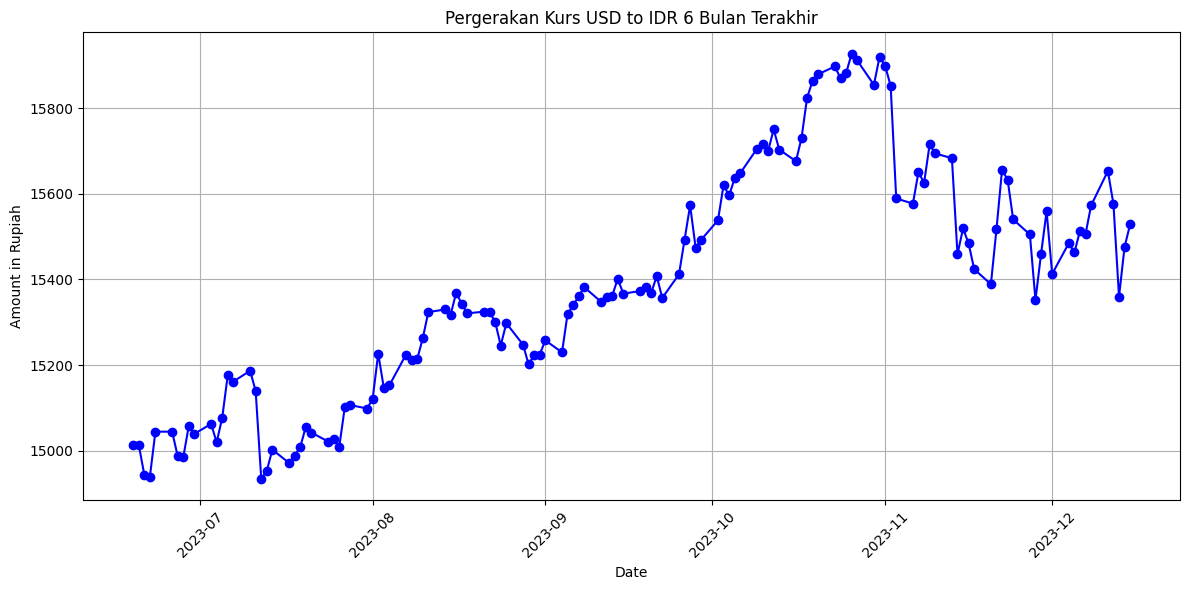

In [71]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['amount_in_rupiah'], marker='o', linestyle='-', color='b')
plt.title('Pergerakan Kurs USD to IDR 6 Bulan Terakhir')
plt.xlabel('Date')
plt.ylabel('Amount in Rupiah')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [72]:
df.describe()

,date,amount_in_rupiah
count,130,130.00
mean,2023-09-16 12:00:00,"15,387.86"
min,2023-06-19 00:00:00,"14,935.00"
25%,2023-08-02 06:00:00,"15,180.25"
50%,2023-09-16 12:00:00,"15,367.50"
75%,2023-10-31 18:00:00,"15,576.75"
max,2023-12-15 00:00:00,"15,927.00"
std,NaN,269.55


## Analisa dan Kesimpulan Plot

- Kurs terendah adalah 14.935 Rupiah per 1 USD di tanggal 12/07/2023
- Kurs tertinggi adalah 15.927 Rupiah per 1 USD di tanggal 26/10/2023
- Rata-rata Kurs 6 Bulan Terakhir adalah 15.387 Rupiah per 1 USD
- Faktor yang menyebabkan kurs di bulan juli 2023 rendah adalah (sumber : https://market.bisnis.com/read/20230706/93/1672196/nilai-tukar-rupiah-terhadap-dolar-as-hari-ini-kamis-6-juli-2023)
    *   Nilai Tukar Rupiah Terhadap Dolar Amerika:
    Pada tanggal 5 Juli 2023, nilai tukar rupiah melemah sebesar 0,15 persen atau turun 23 poin menjadi Rp15.017 per dolar AS.

    *   Penguatan Dolar AS dan Keputusan The Fed:
    Penguatan dolar AS terjadi di tengah fokus pasar pada keputusan The Fed pada pertemuan akhir Juli 2023.
    Ekspektasi 88 persen dari jajak pendapat mengindikasikan kemungkinan kenaikan suku bunga sebesar 25 basis poin.

    *   Ketegangan Perdagangan AS-China:
        -   Ketegangan perdagangan antara AS dan China meningkat karena China memblokir ekspor beberapa produk galium dan germanium, bahan utama dalam pembuatan chip, sebagai pembalasan terhadap tindakan AS.
        
    *   Kondisi Ekonomi China dan Dampaknya:
        -   Ekonomi China sedang mengalami kesulitan pulih dari aturan anti-COVID-19 yang ketat selama tiga tahun.
        -   Tindakan pembatasan ekspor China dapat memicu kekhawatiran terhadap konflik perdagangan yang lebih besar dan gangguan pada rantai pasokan global.

    *   Analisis BI dan Kebijakan Moneter:
        -   Bank Indonesia (BI) diperkirakan akan mempertahankan suku bunga acuan pada 5,75 persen hingga akhir 2023, sejalan dengan tren inflasi yang melandai.
        -   Inflasi pada Juni 2023 berada dalam target sasaran BI (2–4 persen), memberikan ruang bagi BI untuk melonggarkan kebijakan moneter.
        -   BI perlu mempertimbangkan stabilitas nilai tukar rupiah mengingat potensi kenaikan suku bunga oleh The Fed.

    *   Prediksi Nilai Tukar Rupiah:
        -   Monex memprediksi bahwa pada hari berikutnya, rupiah akan membuka fluktuatif namun kemungkinan ditutup melemah di rentang Rp15.000–Rp15.060 per dolar AS.

- Faktor yang menyebabpak kurs di bulan oktober tinggi adalah (sumber : https://finansial.bisnis.com/read/20231026/90/1708111/rupiah-keok-kurs-di-bca-bri-bank-mandiri-bni-hampir-sentuh-rp16000)


    *   Nilai Tukar Rupiah:
        -   Nilai tukar rupiah terhadap dolar AS dibuka melemah ke level Rp15.907 pada 26 Oktober 2023.
        -   Melemahnya rupiah sebesar 0,23% atau 37 poin setelah penutupan perdagangan sebelumnya.

    *   Pergerakan Mata Uang Asia:
        -   Sebagian besar mata uang Asia melemah terhadap dolar AS.
        -   Yen Jepang melemah 0,02%, dolar Singapura turun 0,11%, dolar Hong Kong turun 0,01%, dan won Korea anjlok 0,50%.
        -   Dolar Taiwan melemah 0,13%, peso Filipina turun 0,19%, ringgit Malaysia melemah 0,12%, sementara rupee India dan yuan China stagnan.

    *   Analisis dan Prediksi:
        -   Direktur Laba Forexindo Berjangka, Ibrahim Assuaibi, memprediksi fluktuasi nilai tukar rupiah dengan risiko penutupan melemah di rentang Rp15.850-Rp15.930 per dolar AS.
        -   Situasi geopolitik Timur Tengah yang memicu ketidakpastian ekonomi global, kenaikan harga minyak mentah, dan penurunan tingkat konsumsi masyarakat berpengaruh pada pelemahan rupiah.
        -   Pemerintah merespons dengan paket kebijakan ekonomi, termasuk insentif seperti PPN properti, bantuan beras, dan BLT.

    *   Faktor Pengaruh Lainnya:
        -   Pergerakan rupiah juga dipengaruhi oleh antisipasi pasar terhadap isyarat ekonomi dari AS, terutama terkait data PDB kuartal III/2023 yang akan dirilis.
        -   Tanda-tanda ketahanan data ekonomi AS dapat memberi Federal Reserve (The Fed) ruang lebih untuk mempertahankan suku bunga yang lebih tinggi.
- Dapat di simpulkan bahwa peristiwa perekonomian yang terjadi di dunia berdampak kepada naik turunya kurs USD saat ini.